In [15]:
import nltk
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
nltk.download('movie_reviews')
nltk.download('stopwords')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(docs, columns=['review', 'sentiment'])
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (2000, 2)
                                              review sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard's quick movie review \ndamn ...       neg
2  it is movies like these that make a jaded movi...       neg
3   " quest for camelot " is warner bros . ' firs...       neg
4  synopsis : a mentally unstable man undergoing ...       neg


In [18]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()                                   # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)                  # Remove punctuation/numbers
    words = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    return " ".join(words)

df['clean_review'] = df['review'].apply(preprocess_text)
print(df[['review','clean_review']].head())

                                              review  \
0  plot : two teen couples go to a church party ,...   
1  the happy bastard's quick movie review \ndamn ...   
2  it is movies like these that make a jaded movi...   
3   " quest for camelot " is warner bros . ' firs...   
4  synopsis : a mentally unstable man undergoing ...   

                                        clean_review  
0  plot two teen couples go church party drink dr...  
1  happy bastards quick movie review damn yk bug ...  
2  movies like make jaded movie viewer thankful i...  
3  quest camelot warner bros first featurelength ...  
4  synopsis mentally unstable man undergoing psyc...  


In [19]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [21]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [22]:
y_pred = model.predict(X_test_tfidf)

In [23]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8275

Classification Report:
               precision    recall  f1-score   support

         neg       0.83      0.82      0.83       199
         pos       0.82      0.84      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



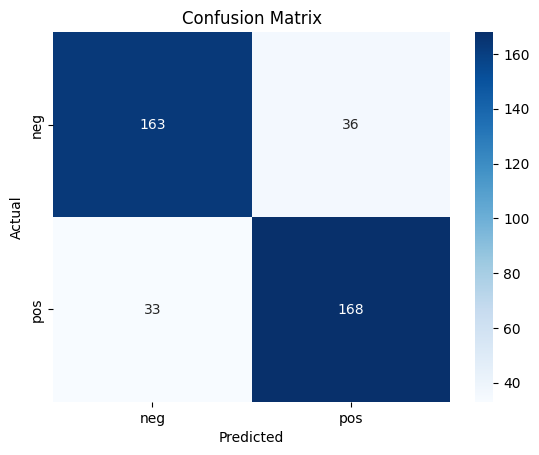

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
sample_reviews = [
    "This movie was fantastic! I really loved the story and the acting.",
    "Worst movie ever. It was boring and too long.",
    "An average film, not bad but not great either."
]

sample_clean = [preprocess_text(r) for r in sample_reviews]
sample_tfidf = tfidf.transform(sample_clean)
predictions = model.predict(sample_tfidf)

for review, sentiment in zip(sample_reviews, predictions):
    print(f"\nReview: {review}\nPredicted Sentiment: {sentiment}")


Review: This movie was fantastic! I really loved the story and the acting.
Predicted Sentiment: pos

Review: Worst movie ever. It was boring and too long.
Predicted Sentiment: neg

Review: An average film, not bad but not great either.
Predicted Sentiment: neg
